# [Smoke Detection Dataset](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset)



### Imports

In [1]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN


mpl.rcParams['figure.figsize'] = (9, 8)

# Data

In [2]:
data = pd.read_csv(
    'data/smoke_detection_iot.csv',
    sep=','
)

display(data.head())
display(data.shape)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


(62630, 16)

### EDA

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data.describe().round(2)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00,62630.00
mean,1.654792e+09,15.97,48.54,1942.06,670.02,12942.45,19754.26,938.63,100.59,184.47,491.46,203.59,80.05,10511.39,0.71
std,1.100025e+05,14.36,8.87,7811.59,1905.89,272.46,609.51,1.33,922.52,1976.31,4265.66,2214.74,1083.38,7597.87,0.45
min,1.654712e+09,-22.01,10.74,0.00,400.00,10668.00,15317.00,930.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.654743e+09,10.99,47.53,130.00,400.00,12830.00,19435.00,938.70,1.28,1.34,8.82,1.38,0.03,3625.25,0.00
50%,1.654762e+09,20.13,50.15,981.00,400.00,12924.00,19501.00,938.82,1.81,1.88,12.45,1.94,0.04,9336.00,1.00
75%,1.654778e+09,25.41,53.24,1189.00,438.00,13109.00,20078.00,939.42,2.09,2.18,14.42,2.25,0.05,17164.75,1.00
max,1.655130e+09,59.93,75.20,60000.00,60000.00,13803.00,21410.00,939.86,14333.69,45432.26,61482.03,51914.68,30026.44,24993.00,1.00


In [5]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

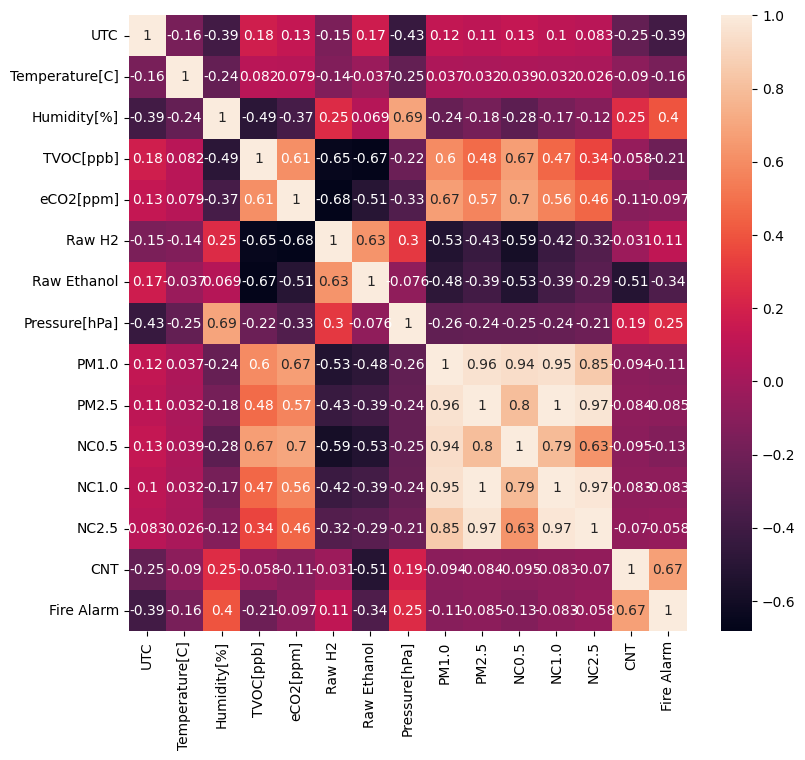

In [6]:
sns.heatmap(data.corr(), annot=True);

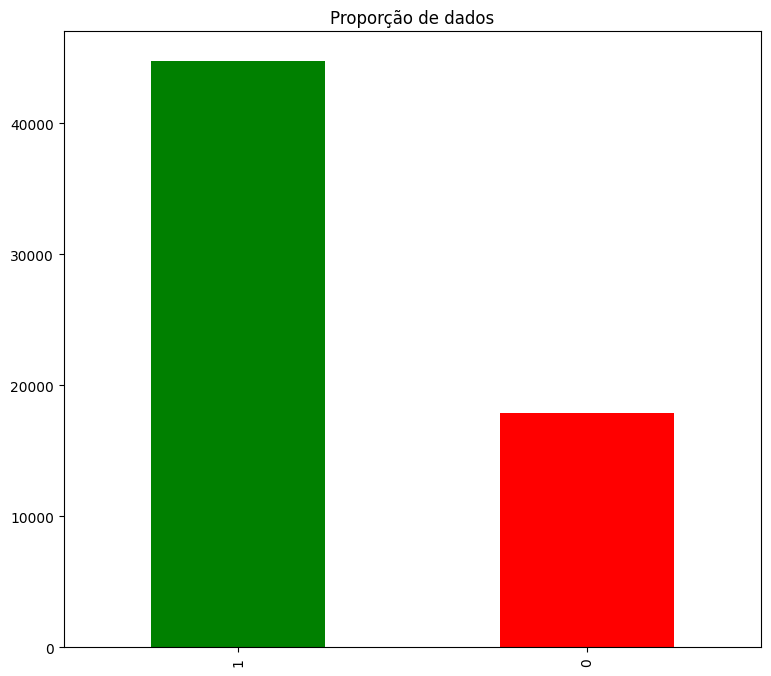

In [ ]:
data['Fire Alarm'].value_counts().plot(kind='bar', title='Distribution of targets', color=['green', 'red']);

### X e y

In [8]:
X = data.drop('Fire Alarm', axis=1)
X.head(2)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1


In [9]:
y = data[['Fire Alarm']].rename(columns={'Fire Alarm': 'target'})
y.head(2)

,target
0,0
1,0


#### Traind and test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50104, 14)
(12526, 14)
(50104, 1)
(12526, 1)


## KNN

In [11]:
n_neighbours = [1, 3, 5, 7, 9, 11]
weights = ['uniform', 'distance']
algorithm = ['auto', 'brute']
p = [1, 2]

parametros = list(itertools.product(n_neighbours, weights, algorithm, p)) #lista com tuplas de combinações de parâmetros de 4 em 4

In [12]:
model = KNN(n_neighbors=3, weights='distance', algorithm='auto', p=2)

model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred)*100 )

Acurácia:  99.99201660546065


#### Choosing the best parameters

Let's use GridSearchCV

In [20]:
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'n_jobs': [-1],
              }

In [14]:
model = KNN()

In [15]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [21]:
grid_search = GridSearchCV(model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\diasrodr\Anaconda3\envs\ml\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_jobs': [-1], 'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}